In [11]:
# this is setup code; don't include in the blog post
import pandas as pd
pd.options.display.max_columns=8
pd.options.display.max_rows=8

import matplotlib
import matplotlib.pyplot as plt


%matplotlib inline

matplotlib.rcParams['figure.figsize'] = [10, 6]

# Introducing WBGAPI: a new python package for accessing World Bank Data #

Version 1.0.4 of the [wbgapi python package][pypi] is now available. This package has been in the [Python Package Index](https://pypi.org/) for almost a year, and the latest version adds several new features to make exploring and searching databases easier and more interactive.

Python packages for World Bank data have been around for a while, but WBGAPI is relatively new. I wrote this package to take advantage of some improvements in the API that have also been around for a while, but were difficult to understand or use, and not well supported in other packages. I also wanted to include better [pandas](https://pandas.pydata.org/) support and in general make it easier to retrieve data without a lot of extra code.

The [README file][pypi] provides an overview and the package itself provides extensive documentation through python's help function. But just to get you started, here is a quick overview of 5 features that make WBGAPI unique.

[pypi]: https://pypi.org/project/wbgapi/

## 1. WBGAPI makes databases easier to understand and use ##

The World Bank API sometimes gives the illusion that all indicators reside in one big
database. For example:

````
https://api.worldbank.org/v2/indicators?format=json
[
    {
    "page": 1,
    "pages": 351,
    "per_page": "50",
    "total": 17517    /* True in a technical sense */
    },
    ...
````

Actually, the API consists of over 63 databases for a **total** (as of this writing) of 17,517 indicators. If you request an indicator such as population (SP.POP.TOTL) that is part of the World Development Indicators (WDI), the API returns the data from the WDI. But if you request one of the natural capital indicators (say NW.NCA.FORE.TO for forests) that is **not** in the WDI, the indicator comes from the Wealth Accounts database. And if you request a bunch of different indicators, it's possible they will come from different databases unless you explicitly specify which database you want for each indicator. To make it even more complicated, different databases often contain different countries and time periods, and are updated on different schedules. All of these details are available in the API, if you know how to find them.

WBGAPI has a different implementation that provides greater clarity and consistency about which database your data is coming from and what that database includes. By default, data requests are made against the WDI; it's not possible to inadvertently get data from an unspecified dataset.

WBGAPI provides an easy way to list all available databases:

In [12]:
import wbgapi as wb
wb.source.info()

id,name,lastupdated
1,Doing Business,2019-10-23
2,World Development Indicators,2020-12-16
3,Worldwide Governance Indicators,2020-09-28
5,Subnational Malnutrition Database,2016-03-21
6,International Debt Statistics,2021-01-21
11,Africa Development Indicators,2013-02-22
12,Education Statistics,2020-12-20
13,Enterprise Surveys,2017-01-03
14,Gender Statistics,2020-12-21
15,Global Economic Monitor,2020-07-27


## 2. Easier search and discovery ##

WBGAPI includes `info()` functions like the one shown above for exploring the indicators, countries and other elements of the API. These are optimized for both interactive mode and jupyter notebooks,
but you can access the same information programmatically as interable objects.
For example:

````
wb.series.info()             # display all indicators in the WDI database
wb.series.info(db=14)        # display the Gender Statistics database instead
wb.series.info(q='women')    # all indicators with the word 'women'
wb.economy.info()            # show the country code and name list for WDI database
wb.time.info()               # which time periods are included in the WDI
wb.region.info()             # World Bank regions
````

You can also search metadata at the database level:

In [13]:
# a somewhat trivial example for demonstration purposes with abbreviated results
wb.search('pound')

ID,Name,Field,Value
CHI,Channel Islands,CurrencyUnit,Pound sterling
EGY,"Egypt, Arab Rep.",CurrencyUnit,Egyptian pound
GBR,United Kingdom,CurrencyUnit,Pound sterling
GIB,Gibraltar,CurrencyUnit,Gibraltar pound
IMN,Isle of Man,CurrencyUnit,Pound sterling
IRL,Ireland,SpecialNotes,"...rate was adopted by the EU Council on January 1, 1999: 1 euro = 0.787564 Irish pound. Please note that historical data before 1999 are not actual euros and are not..."
LBN,Lebanon,CurrencyUnit,Lebanese pound
SDN,Sudan,CurrencyUnit,Sudanese pound
SSD,South Sudan,CurrencyUnit,South Sudanese Pound
SYR,Syrian Arab Republic,CurrencyUnit,Syrian pound


Or you can access metadata for a series or country/economy:

````
wb.series.metadata.get('EN.ATM.CO2E.KT') # metadata for CO2 emissions
wb.economy.metadata.get('FRA')           # country metadata for France
````

## 3. Simple but powerful data queries ##

WBGAPI lets you request a single indicator or any number of indicators from a database; the same is true for countries, aggregates and time periods. For example, you can request 2 indicators for 40 countries, or 40 indicators for 2 countries (or all countries) in a single request. If your request exceeds the API limit in some way, WBGAPI will chunk it into multiple API calls.

Here are just a few examples building on [pandas](https://pandas.pydata.org) data frames (pandas is optional but makes WBGAPI much more powerful):

In [21]:
# population for 3 countries (all time periods by default)
wb.data.DataFrame('SP.POP.TOTL', ['IDN', 'VNM', 'THA'], labels=True)

,Country,YR1960,YR1961,YR1962,...,YR2017,YR2018,YR2019,YR2020
economy,,,,,,,,,
THA,Thailand,27397207.0,28224187.0,29080938.0,...,69209858.0,69428524.0,69625582.0,NaN
VNM,Vietnam,32670039.0,33666110.0,34683407.0,...,94596642.0,95540395.0,96462106.0,NaN
IDN,Indonesia,87751068.0,90098394.0,92518377.0,...,264645886.0,267663435.0,270625568.0,NaN


In [15]:
# Indicators in the Health topic (8) for Kenya in 5-year increments
wb.data.DataFrame(wb.topic.members(8), 'KEN', time=range(2000, 2020, 5), labels=True)

,Series,YR2000,YR2005,YR2010,YR2015
series,,,,,
SH.STA.BRTW.ZS,Low-birthweight babies (% of births),12.331372,12.246190,11.874405,1.146681e+01
SP.POP.1564.FE.ZS,"Population ages 15-64, female (% of female pop...",52.769651,54.129002,54.914827,5.670241e+01
SG.VAW.NEGL.ZS,Women who believe a husband is justified in be...,NaN,NaN,NaN,NaN
SP.REG.DTHS.ZS,Completeness of death registration with cause-...,NaN,NaN,NaN,NaN
...,...,...,...,...,...
SP.POP.65UP.TO,"Population ages 65 and above, total",726783.000000,762121.000000,812178.000000,1.005943e+06
SP.REG.BRTH.ZS,Completeness of birth registration (%),NaN,NaN,NaN,NaN
SG.VAW.1549.ZS,Proportion of women subjected to physical and/...,NaN,NaN,NaN,NaN
SH.STA.DIAB.ZS,Diabetes prevalence (% of population ages 20 t...,NaN,NaN,3.500000,NaN


In [22]:
# Population and GDP for 3 Latin American countries and 5 years
# WBGAPI automatically uses pandas multi-index feature for complex data drames
wb.data.DataFrame(['SP.POP.TOTL', 'NY.GDP.PCAP.CD'], ['BRA', 'COL', 'ARG'], range(2010, 2015))

YR2010        YR2011        YR2012  \
economy series                                                     
ARG     NY.GDP.PCAP.CD  1.038596e+04  1.284886e+04  1.308266e+04   
        SP.POP.TOTL     4.078845e+07  4.126149e+07  4.173327e+07   
BRA     NY.GDP.PCAP.CD  1.128624e+04  1.324561e+04  1.237002e+04   
        SP.POP.TOTL     1.957136e+08  1.975145e+08  1.992873e+08   
COL     NY.GDP.PCAP.CD  6.336709e+03  7.335167e+03  8.050255e+03   
        SP.POP.TOTL     4.522270e+07  4.566275e+07  4.607572e+07   

                              YR2013        YR2014  
economy series                                      
ARG     NY.GDP.PCAP.CD  1.308025e+04  1.233480e+04  
        SP.POP.TOTL     4.220294e+07  4.266950e+07  
BRA     NY.GDP.PCAP.CD  1.230032e+04  1.211259e+04  
        SP.POP.TOTL     2.010359e+08  2.027637e+08  
COL     NY.GDP.PCAP.CD  8.218348e+03  8.114344e+03  
        SP.POP.TOTL     4.649549e+07  4.696771e+07

And since WBGAPI supports pandas, it's easy to use the built-in graph functions or whatever graph package you prefer (ggplot, seaborn, etc):

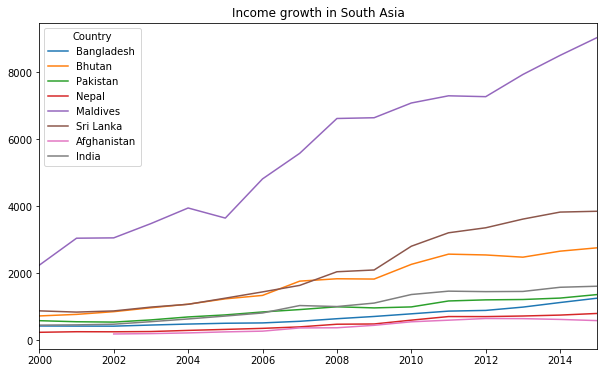

In [25]:
# Basic chart of income growth for countries in the South Asia region
wb.data.DataFrame('NY.GDP.PCAP.CD',
    economy=wb.region.members('SAS'),
    time=range(2000, 2016), numericTimeKeys=True,
    labels=True).set_index('Country').transpose().plot(title='Income growth in South Asia')


## 4. Custom dimensions ##

Most databases in the API have 3 dimensions: series, country (or economy) and time. But an increasing number of databases have additional dimensions. For instance, [WDI Archives](http://api.worldbank.org/v2/en/sources/57/concepts) includes a version dimension, and the [ICP database](http://api.worldbank.org/v2/en/sources/62/concepts) adds Classification. WBGAPI makes allows you to view all dimensions of a database:

    wb.source.concepts(db=57) # dimensions for WDI Archives

and query them:

In [18]:
# Fetch GDP from an old version of the WDI
wb.data.DataFrame('NY.GDP.MKTP.CD', ['CAN', 'FRA'], version=201504, db=57,
                  skipBlanks=True, index='time')

,CAN,FRA
time,,
YR1960,4.109345e+10,6.265147e+10
YR1961,4.076797e+10,6.834674e+10
YR1962,4.197885e+10,7.631378e+10
YR1963,4.465717e+10,8.555111e+10
...,...,...
YR2010,1.614072e+12,2.646837e+12
YR2011,1.778632e+12,2.862680e+12
YR2012,1.821445e+12,2.686723e+12
YR2013,1.826769e+12,2.806428e+12


Custom dimensions can be singular or multiple just like any other dimension.
In this example, WDI version numbers are in YYYYMM format. This lets you
request data from, say, the April release of the WDI over several years
using a python range that increments in steps of 100:

Text(0, 0.5, 'Millions')

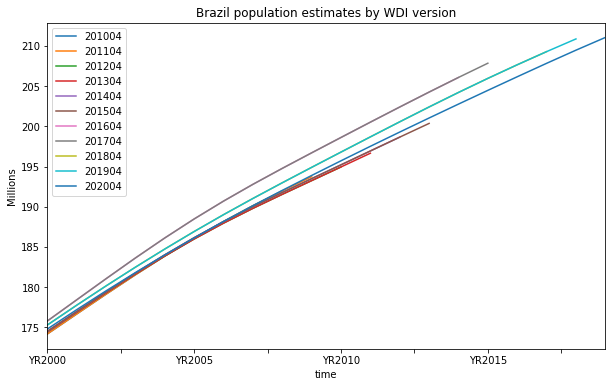

In [19]:
# How have the population estimates for Brazil changed over time?
df = wb.data.DataFrame('SP.POP.TOTL', 'BRA', db=57,
                       time=range(2000, 2020), index='time',
                       version=range(201004, 202104, 100))
df = df / 1000000 # in millions

df.plot(title='Brazil population estimates by WDI version').set_ylabel('Millions')

## 5. Resolving country codes ##

One common and onerous task in development data is resolving country codes across different systems and as official names change. WBG includes a beta version of a country name lookup utility that can usually guess the correct code for names of countries in the UN system as well as those used by other international organizations and donors. The output is optimized for human readability, but is based on a python dictionary so it can be used programmatically as well.

In [20]:
wb.economy.coder(['Argentina', 'Slovakia', 'Swaziland',
                  'South Korea', 'Burma', 'England', 'US', 'Toronto'])

ORIGINAL NAME,WBG NAME,ISO_CODE
Argentina,Argentina,ARG
Slovakia,Slovak Republic,SVK
Swaziland,Eswatini,SWZ
South Korea,"Korea, Rep.",KOR
Burma,Myanmar,MMR
England,United Kingdom,GBR
US,United States,USA
Toronto,,


## Getting Started ##

To get started, install WBGAPI using pip:

````
pip install wbgapi
````

Then review the [README file](https://pypi.org/project/wbgapi/) to get a sense of typical uses.

For more examples, see the [cookbook](https://nbviewer.jupyter.org/github/tgherzog/wbgapi/blob/master/examples/wbgapi-cookbook.ipynb)
in GitHub.